<center><h1>Group 2404 </h1></center>


<center><style>
table {
    font-size: 24px;
}
</style></center>

| Last Name          | First Name            |Student Number|
|--------------------|-----------------------|----------------|
| Malagoli           | Pietro                |2125711         |
| Boccanera          | Eugenia               |2109310         |
| Braidi             | Federico              |2122169         |
| Lovato             | Matteo                |2104269         |           

## Importing necessary library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost 
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)
from sklearn.metrics import accuracy_score

mycmap = "winter"
mpl.rcParams['image.cmap'] = mycmap
plt.rcParams['font.size'] = 13

XGBoost version: 2.0.3


# Load and splitting of the data

In [2]:
np.random.seed(12345)

dname="./DATA/"
str0="_XGB_24.dat"
fnamex=dname+'x'+str0
fnamey=dname+'y'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

N_train = int(0.75*N)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
print(f"N={N}, N_train={N_train}, L={L}")

N=4000, N_train=3000, L=4


## Classify function initialization

In [3]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%   Accuracy={:.3f}".format(100*(1-clf.score(x_test, y_test)),clf.score(x_test, y_test)))
    '''S=50
    dx = 1
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,L))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:2] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    #fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    #scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    #scat(AX[1],x_train[:],y_train,title="training set")
    #fig.tight_layout()
    #plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(2,1,figsize=(12, 5))
        for i in range(min(2,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=400, pad_inches=0.02)   
        plt.show()'''

# Question 1 (w. Regularization)

In [4]:
# Define a list of parameters to try
params_to_try = {
    'lambda': [0.4, 0.3, 0.2, 0.1, 1, 10],        # L2 regularization term (λ)
    'gamma': [0.05, 0.1, 0.5, 1, 1.5, 2],         # Minimum loss reduction required to make a further partition on a leaf node (γ)
    'n_estimators': [30, 50, 100, 200, 300, 400],  # Number of boosting rounds (trees)
    'max_depth': [2, 3, 5, 7, 10],            # Maximum depth of a tree
    'learning_rate': [0.5, 0.3, 0.1, 0.01, 0.001]  # Learning rate
}

# Initialize lists to store parameter combinations and corresponding accuracy values
param_combinations = []
accuracy_values = []

# Iterate over each combination of parameters
for i, lambda_val in enumerate(params_to_try['lambda']):
    for j, gamma_val in enumerate(params_to_try['gamma']):
        for k, n_estimators_val in enumerate(params_to_try['n_estimators']):
            for l, max_depth_val in enumerate(params_to_try['max_depth']):
                for m, learning_rate_val in enumerate(params_to_try['learning_rate']):
                    # Define XGBoost classifier with current parameters
                    xgb_clf = XGBClassifier(
                        objective='binary:logistic',      # Use binary logistic regression for binary classification
                        learning_rate=learning_rate_val,  # Learning rate
                        max_depth=max_depth_val,          # Maximum depth of a tree
                        reg_lambda=lambda_val,            # L2 regularization term
                        gamma=gamma_val,                  # Minimum loss reduction required to make a further partition on a leaf node
                        n_estimators=n_estimators_val,   # Number of boosting rounds (trees)
                        random_state=12345
                    )
                    # Train the model
                    xgb_clf.fit(x_train, y_train)

                    # Make predictions
                    y_pred = xgb_clf.predict(x_test)

                    # Calculate accuracy
                    accuracy = accuracy_score(y_test, y_pred)

                    # Store the parameter combination and accuracy value
                    param_combinations.append((lambda_val, gamma_val, n_estimators_val, max_depth_val, learning_rate_val))
                    accuracy_values.append(accuracy)

## Plot for Question 1 (w. Regularization)

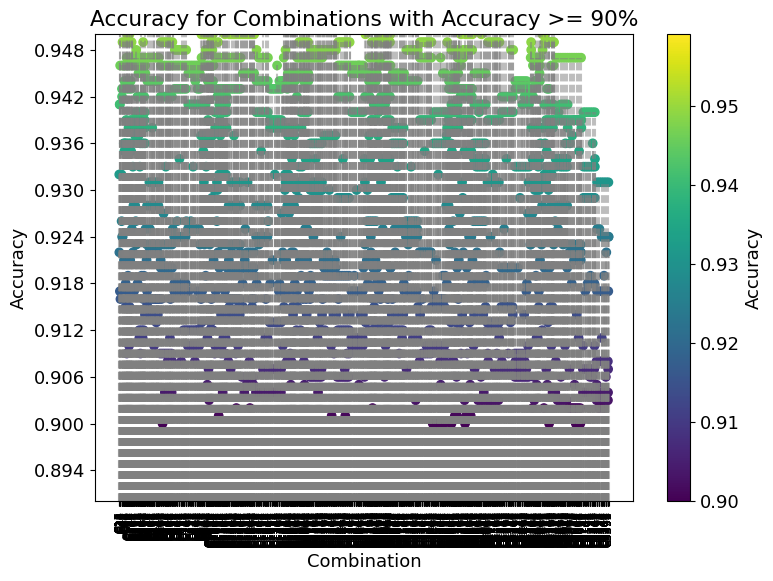

Highest Accuracy Score (w. Reg): 0.959
Corresponding Combination (w. Reg): [ 0.2  0.1 30.  10.   0.1]


In [5]:

# Convert lists to numpy arrays for plotting
param_combinations = np.array(param_combinations)
accuracy_values = np.array(accuracy_values)

# Generate unique identifiers for each combination
combination_ids = np.arange(len(param_combinations))

# Find indices of combinations with accuracy >= 90%
indices_above_90 = np.where(accuracy_values >= 0.90)[0]

# Plotting the accuracy for combinations with accuracy >= 90%
plt.figure(figsize=(8, 6))
plt.scatter(indices_above_90, accuracy_values[indices_above_90], c=accuracy_values[indices_above_90], cmap='viridis', marker='o')
plt.colorbar(label='Accuracy')
plt.title('Accuracy for Combinations with Accuracy >= 90%')
plt.xlabel('Combination')
plt.ylabel('Accuracy')
plt.xticks(indices_above_90, [f'C{i+1}' for i in indices_above_90], rotation=90, fontsize=8)

# Add dashed lines connecting xticks to the respective points
for idx, acc in zip(indices_above_90, accuracy_values[indices_above_90]):
    plt.plot([idx, idx], [0.89, acc], linestyle='--', color='gray', alpha=0.5)

# Improve y-axis ticks definition
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer ticks on y-axis
#plt.gca().yaxis.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.ylim(0.89, 0.95)  # Set y-axis limits to make ticks more visible

plt.tight_layout()
plt.show()

# Find index of the highest accuracy score
highest_accuracy_index = np.argmax(accuracy_values)
highest_accuracy = accuracy_values[highest_accuracy_index]
corresponding_combination = param_combinations[highest_accuracy_index]

print("Highest Accuracy Score (w. Reg):", highest_accuracy)
print("Corresponding Combination (w. Reg):", corresponding_combination)

# Question 1 (w.o. Regularization)

In [6]:
# Define a list of parameters to try
params_to_try = {
    #'lambda': [0.1, 1, 10],        # L2 regularization term (λ)
    'gamma': [0.05, 0.1, 0.5, 1, 1.5, 2],         # Minimum loss reduction required to make a further partition on a leaf node (γ)
    'n_estimators': [30, 50, 100, 200, 300, 400],  # Number of boosting rounds (trees)
    'max_depth': [2, 3, 5, 7, 10],            # Maximum depth of a tree
    'learning_rate': [0.5, 0.3, 0.1, 0.01, 0.001]  # Learning rate
}

# Initialize lists to store parameter combinations and corresponding accuracy values
param_combinations = []
accuracy_values = []

# Iterate over each combination of parameters
#for i, lambda_val in enumerate(params_to_try['lambda']):
for j, gamma_val in enumerate(params_to_try['gamma']):
    for k, n_estimators_val in enumerate(params_to_try['n_estimators']):
        for l, max_depth_val in enumerate(params_to_try['max_depth']):
            for m, learning_rate_val in enumerate(params_to_try['learning_rate']):
                # Define XGBoost classifier with current parameters
                xgb_clf = XGBClassifier(
                        objective='binary:logistic',      # Use binary logistic regression for binary classification
                        learning_rate=learning_rate_val,  # Learning rate
                        max_depth=max_depth_val,          # Maximum depth of a tree
                        #reg_lambda=lambda_val,            # L2 regularization term
                        gamma=gamma_val,                  # Minimum loss reduction required to make a further partition on a leaf node
                        n_estimators=n_estimators_val,   # Number of boosting rounds (trees)
                        random_state=12345
                )
                # Train the model
                xgb_clf.fit(x_train, y_train)

                # Make predictions
                y_pred = xgb_clf.predict(x_test)

                # Calculate accuracy
                accuracy = accuracy_score(y_test, y_pred)

                # Store the parameter combination and accuracy value
                param_combinations.append((gamma_val, n_estimators_val, max_depth_val, learning_rate_val))
                accuracy_values.append(accuracy)

## Plot for Question 1 (w.o. Regularization)

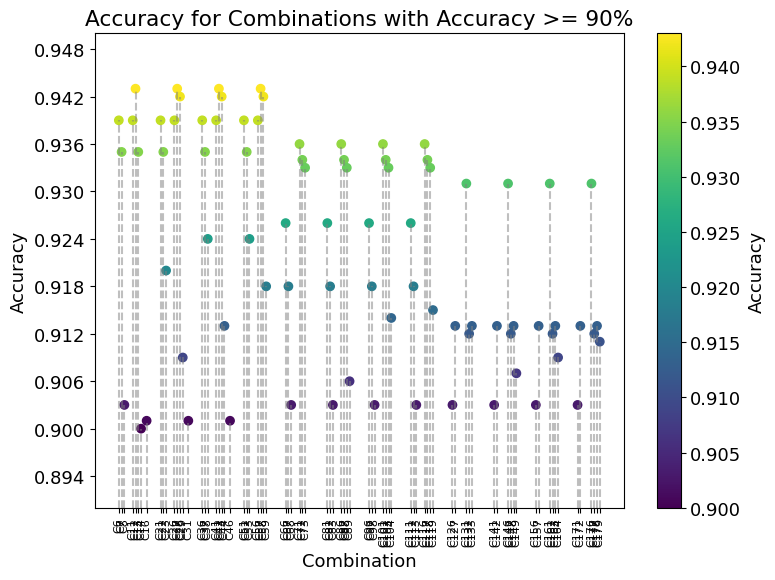

Highest Accuracy Score (w.o. Reg): 0.943
Corresponding Combination (w.o. Reg): [  0.1 100.    7.    0.3]


In [ ]:

# Convert lists to numpy arrays for plotting
param_combinations = np.array(param_combinations)
accuracy_values = np.array(accuracy_values)

# Generate unique identifiers for each combination
combination_ids = np.arange(len(param_combinations))

# Find indices of combinations with accuracy >= 90%
indices_above_90 = np.where(accuracy_values >= 0.90)[0]

# Plotting the accuracy for combinations with accuracy >= 90%
plt.figure(figsize=(8, 6))
plt.scatter(indices_above_90, accuracy_values[indices_above_90], c=accuracy_values[indices_above_90], cmap='viridis', marker='o')
plt.colorbar(label='Accuracy')
plt.title('Accuracy for Combinations with Accuracy >= 90%')
plt.xlabel('Combination')
plt.ylabel('Accuracy')
plt.xticks(indices_above_90, [f'C{i+1}' for i in indices_above_90], rotation=90, fontsize=8)

# Add dashed lines connecting xticks to the respective points
for idx, acc in zip(indices_above_90, accuracy_values[indices_above_90]):
    plt.plot([idx, idx], [0.89, acc], linestyle='--', color='gray', alpha=0.5)

# Improve y-axis ticks definition
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer ticks on y-axis
#plt.gca().yaxis.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.ylim(0.89, 0.95)  # Set y-axis limits to make ticks more visible

plt.tight_layout()
plt.show()

# Find index of the highest accuracy score
highest_accuracy_index = np.argmax(accuracy_values)
highest_accuracy = accuracy_values[highest_accuracy_index]
corresponding_combination = param_combinations[highest_accuracy_index]

print("Highest Accuracy Score (w.o. Reg):", highest_accuracy)
print("Corresponding Combination (w.o. Reg):", corresponding_combination)